In [1]:
import os
if __name__ == "__main__":
    os.chdir("..")

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
from utils.data_class import Shelf

In [3]:
model = YOLO("models/shelf.pt")

In [4]:
cvt_rgb = lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

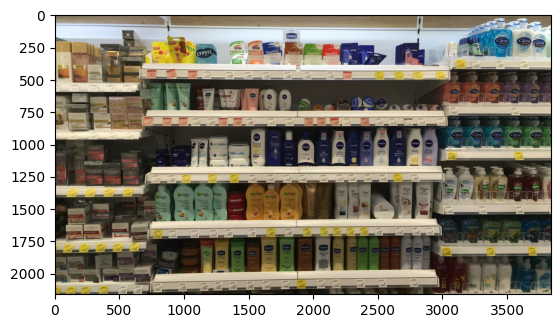

In [6]:
def detect_shelves(img):
    results = model(img)
    shelves = results[0].obb.xyxyxyxy
    shelves_objs = [Shelf(shelf) for shelf in shelves]
    return shelves_objs

if __name__ == "__main__":
    img = cv2.imread("data/2.jpg")
    plt.imshow(cvt_rgb(img))

In [7]:
if __name__ == "__main__":
    shelves = detect_shelves(img)


0: 96x128 24.1ms
Speed: 1.1ms preprocess, 24.1ms inference, 0.0ms postprocess per image at shape (1, 3, 96, 128)


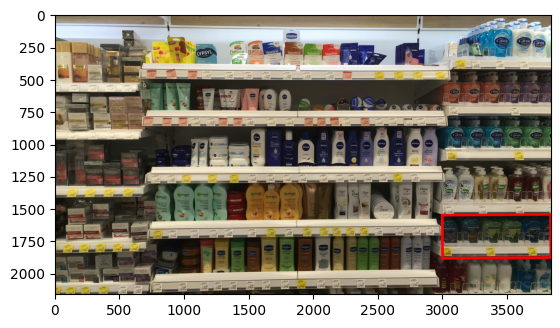

In [ ]:
def draw_shelf(img, shelf):
    shelf_points = np.array([shelf.p1, shelf.p2, shelf.p3, shelf.p4])
    cv2.polylines(img, [shelf_points], True, color=(0,0,255), thickness=20)
    return img

if __name__ == "__main__":
    drawed_img = draw_shelf(img.copy(), shelves[1])
    plt.imshow(cvt_rgb(drawed_img))

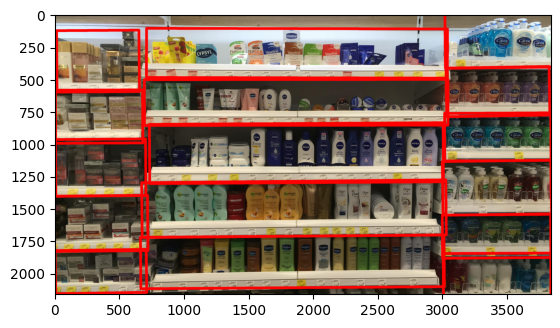

In [ ]:
def draw_shelves(img, shelves):
    img_copy = img.copy()

    for shelf in shelves:
    
        img_copy = draw_shelf(img_copy, shelf)
    return img_copy

if __name__ == "__main__":
    img_drawed = draw_shelves(img, shelves)
    plt.imshow(cvt_rgb(img_drawed))